#### EE7204 Computer Vision and Image Processing - Take Home Assignment 01
#### EG/2018/3318 - Dissanayake D.M.M.B

#### Github Link: https://github.com/ManojBD/EE7204_Assignment02_3318.git

Q1

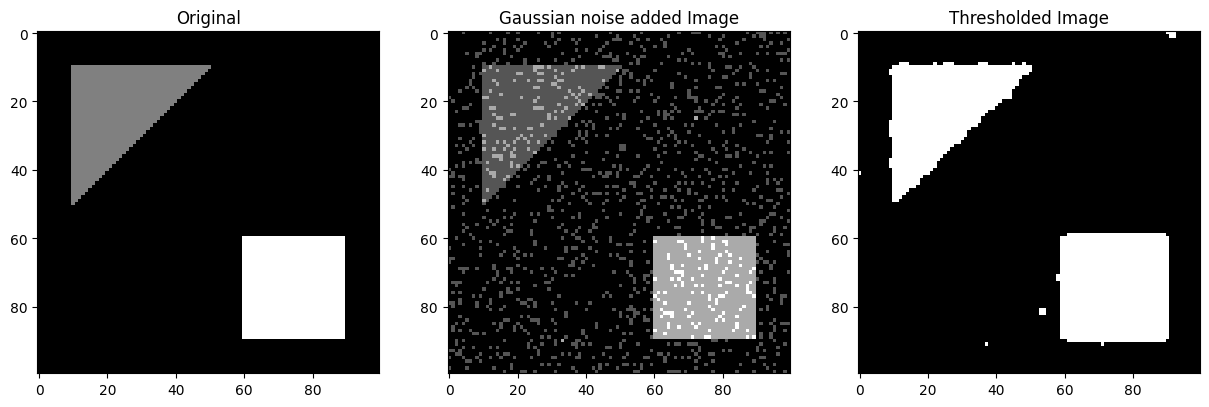

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


# Create the image with 2 objects and a total of 3 pixel values
image = np.zeros((100, 100), dtype=np.uint8)

# Create a triangle
triangle_pts = np.array([[10, 10], [50, 10], [10, 50]], np.int32)
cv2.fillPoly(image, [triangle_pts], color=1)

# Create a square
image[60:90, 60:90] = 2

# Add Gaussian noise to the image
gauss_noise=np.zeros((100,100),dtype=np.uint8)
cv2.randn(gauss_noise,0.7,0.7)
gauss_noise=(gauss_noise*0.5).astype(np.uint8)

#noise = np.random.normal(0, 1, img.shape)
noisy_img =  gauss_noise +  image

# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(noisy_img,(5,5),0)
threshold_value, thresholded_img = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Display the results
fig, axs = plt.subplots(1, 3, figsize=(15, 15))
axs[0].imshow(image, cmap='gray')
axs[0].set_title('Original')
axs[1].imshow(noisy_img, cmap='gray')
axs[1].set_title('Gaussian noise added Image')
axs[2].imshow(thresholded_img, cmap='gray')
axs[2].set_title('Thresholded Image')

plt.show()

Q2

C:\Users\Manoj Dissanayake\AppData\Local\Temp\ipykernel_6304\46820869.py:33: RuntimeWarning: overflow encountered in scalar subtract
  return abs(seed_val - pixel_val) < 10


Text(0.5, 1.0, 'Segmented Image')

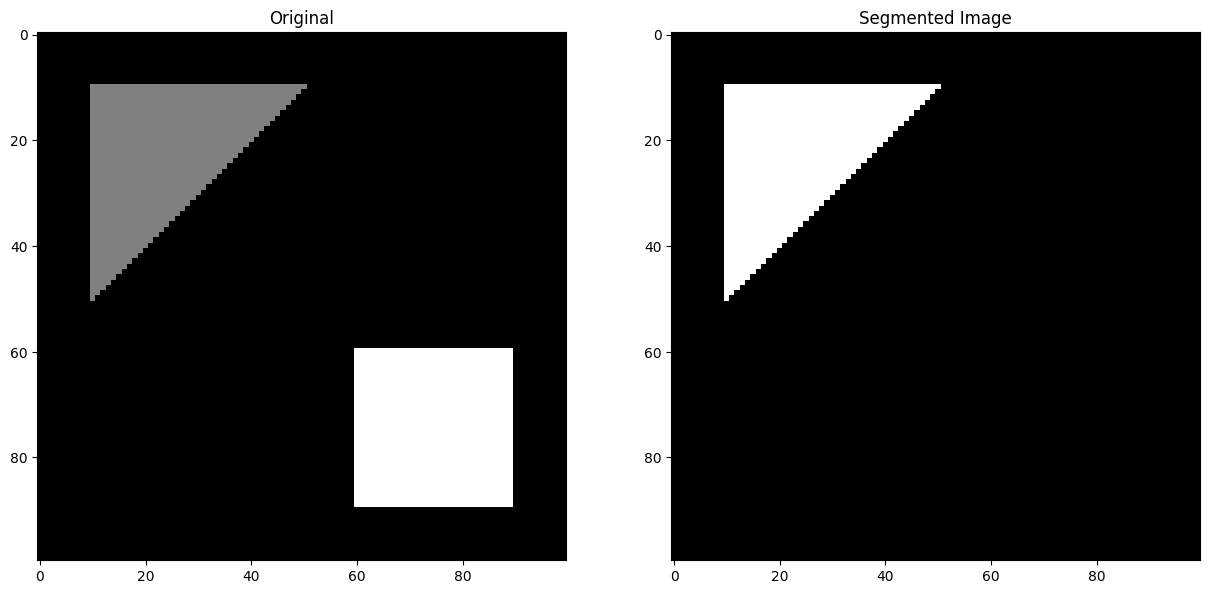

In [2]:
import numpy as np
import cv2
import skimage
from skimage import data 
from matplotlib import pyplot as plt


# Create the image with 2 objects and a total of 3 pixel values
image = np.zeros((100, 100), dtype=np.uint8)

# Create a triangle
triangle_pts = np.array([[10, 10], [50, 10], [10, 50]], np.int32)
cv2.fillPoly(image, [triangle_pts], color=1)

# Create a square
image[60:90, 60:90] = 2

# Add Gaussian noise to the image
image = cv2.GaussianBlur(image , (3, 3), 0.5)

# Define the seed points as a 2xn numpy array
seeds = np.array([[20,20]])

# Initialize a binary mask to represent the segmented image
mask = np.zeros(image.shape, dtype=np.uint8)

# Iterate through each seed point and mark it as foreground
for seed in seeds:
    mask[seed[0], seed[1]] = 1

# Define a function to check the condition for foreground/background
def check_condition(seed_val, pixel_val):
    return abs(seed_val - pixel_val) < 10
  

# Initialize a list of foreground pixels to be iterated through
foreground_pixels = [tuple(seed) for seed in seeds]

# Iterate through each foreground pixel and its neighbors to segment the image
while len(foreground_pixels) > 0:
    # Pop the next foreground pixel from the list
    pixel = foreground_pixels.pop(0)
    # Iterate through the pixel's neighbors
    for i in range(-1, 2):
        for j in range(-1, 2):
            # Skip the center pixel (i.e., the current pixel)
            if i == 0 and j == 0:
                continue
            # Check if the neighbor is within the image boundaries
            if pixel[0] + i >= 0 and pixel[0] + i < image.shape[0] and \
               pixel[1] + j >= 0 and pixel[1] + j < image.shape[1]:
                # Check if the neighbor is not already segmented
                if mask[pixel[0] + i, pixel[1] + j] == 0:
                    # Check the condition for foreground/background
                    if check_condition(image[pixel], image[pixel[0] + i, pixel[1] + j]):
                        # Mark the neighbor as foreground and add it to the list
                        mask[pixel[0] + i, pixel[1] + j] = 1
                        foreground_pixels.append((pixel[0] + i, pixel[1] + j))
                    else:
                        # Mark the neighbor as background
                        mask[pixel[0] + i, pixel[1] + j] = 0

# Apply the binary mask to the original image to obtain the segmented image
segmented_image = image * mask

# Display the original image and the segmented image
fig, axs = plt.subplots(1, 2, figsize=(15, 15))
axs[0].imshow(image, cmap='gray')
axs[0].set_title('Original')
axs[1].imshow(segmented_image, cmap='gray')
axs[1].set_title('Segmented Image')

